In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
print (tf.__version__)
print (sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print (module.__name__, module.__version__)

2.0.0-beta1
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-beta1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test)=fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train=y_train_all[:5000],y_train_all[5000:]

print (x_valid.shape, y_valid.shape)
print (x_train.shape, y_train.shape)
print (x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
# x = (x - u)/ std
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))

for _ in range(20):
    model.add(keras.layers.Dense(100,activation="selu"))   #selu自带归一化的性质

model.add(keras.layers.AlphaDropout(rate=0.5))
model.add(keras.layers.Dense(10,activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

W0705 16:22:20.624762 4390843840 deprecation.py:323] From /anaconda3/envs/tylab/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4149: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [9]:
logdir = './dnn_bn_callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                "fashion_mnist_model.h5")
callbacks=[
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only = True),
]

history=model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled,y_valid),
                 callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 13s 240us/sample - loss: 0.6799 - accuracy: 0.7712 - val_loss: 0.6463 - val_accuracy: 0.8246
Epoch 2/10
55000/55000 [==============================] - 17s 305us/sample - loss: 0.4540 - accuracy: 0.8427 - val_loss: 0.5605 - val_accuracy: 0.8628
Epoch 3/10
55000/55000 [==============================] - 15s 281us/sample - loss: 0.4004 - accuracy: 0.8603 - val_loss: 0.4969 - val_accuracy: 0.8732
Epoch 4/10
55000/55000 [==============================] - 15s 276us/sample - loss: 0.3686 - accuracy: 0.8701 - val_loss: 0.5364 - val_accuracy: 0.8680
Epoch 5/10
55000/55000 [==============================] - 15s 276us/sample - loss: 0.3492 - accuracy: 0.8761 - val_loss: 0.5126 - val_accuracy: 0.8766
Epoch 6/10
55000/55000 [==============================] - 11s 194us/sample - loss: 0.3337 - accuracy: 0.8827 - val_loss: 0.5936 - val_accuracy: 0.8666
Epoch 7/10
55000/55000 [=====================

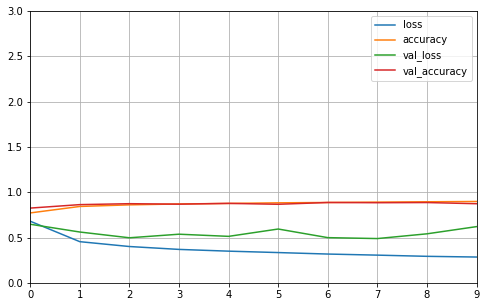

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()
plot_learning_curves(history) 